In [1]:
# standart libs
import sys
import random
import copy
from operator import itemgetter
from PIL import Image


# 3rd party libs
import pandas as pd
import numpy as np
import gempy as gp
import matplotlib.pyplot as plt
import scipy.stats as ss


# local
import functions.realization_setup as real_setup
import functions.realization_run as real_run
import functions.post_processing as post_pro
import functions.uq_runs as uq_runs

# executable
print(sys.executable)

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


/home/stefan/coding/notebooks/env/bin/python


In [2]:
# instantiate the geo_model
geo_model = gp.create_model("GeoModel")

# defautl data
geo_model = gp.init_data(
    geo_model,
    extent=[0, 1, 0, 1, 0, 1],
    resolution=[1, 1, 1]
)

# compile theno function
gp.set_interpolation_data(
    geo_model,
    compile_theano=True,
    theano_optimizer='fast_run',
)

Active grids: ['regular']
Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                     values
range              1.73205
$C_o$            0.0714286
drift equations        [3]


In [3]:
# meta
geo_model_extent_1 = [0,1000,0,1000,0,1000]
section_1 = {
    'p1': [0, 500],
    'p2': [1000, 500],
    'resolution': [200, 200]
}

# sereis
series_df_1 = pd.DataFrame(columns=['name', 'isfault', 'order_series'])
series_df_1.loc[0] = { 'order_series': 0, 'name': 'Basement_Series', 'isfault': False }
series_df_1.loc[1] = { 'order_series': 1, 'name': 'Strat_Series', 'isfault': False }

# surfaces
surfaces_df_1 = pd.DataFrame(columns=['name', 'serie', 'order_surface'])
surfaces_df_1.loc[0] = { 'name': 'basement', 'serie': 'Basement_Series', 'order_surface': 0 }
surfaces_df_1.loc[2] = { 'name': 'rock1', 'serie': 'Strat_Series', 'order_surface': 1 }
surfaces_df_1.loc[1] = { 'name': 'rock2', 'serie': 'Strat_Series', 'order_surface': 2 }

# geoData
surface_points_input_data_1 = pd.read_csv('./data/model2_surface_points.csv')
orientaions_input_data_1 = pd.read_csv('./data/model2_orientations.csv')

# Format geological_input_data
surface_points_original_df_1 = surface_points_input_data_1[['X', 'Y', 'Z', 'formation']]

# rename colums
surface_points_original_df_1.columns = ['X', 'Y', 'Z', 'surface']

# add distribution type and parameter
surface_points_original_df_1['param1'] = 10

# Orientaions
orientations_original_df_1 = orientaions_input_data_1[['X', 'Y', 'Z', 'dip', 'azimuth', 'polarity', 'formation']]

In [4]:
# %%timeit
# setup model 1
real_setup.setup_realization(
        geo_model=geo_model,
        geo_model_extent=geo_model_extent_1,
        section=section_1,
        series_df=series_df_1,
        surfaces_df=surfaces_df_1,
        surface_points_original_df=surface_points_original_df_1,
        orientations_original_df=orientations_original_df_1
)

if real_run.check_setup_single_realization(geo_model):
    solution = gp.compute_model(model=geo_model, sort_surfaces=False)
    
Bx = post_pro.compute_boolean_matrix_for_section_surface_top(geo_model)

extent = { 'z_min': 0, 'z_max': 1000 }
section_coordinates = post_pro.compute_setction_grid_coordinates(geo_model, extent)

tops_dict = post_pro.get_tops_coordinates(Bx, section_coordinates)

Active grids: ['regular']
Active grids: ['regular' 'sections']
HOTFIX in update_series()
HOTFIX in update_surfaces()
Run realizations setup checks until stable workflow.
HOTFIX in gempy/core/gempy_api.py 328


/home/stefan/coding/notebooks/env/lib/python3.8/site-packages/gempy/core/solution.py:196: FutureWarning: marching_cubes_lewiner is deprecated in favor of marching_cubes. marching_cubes_lewiner will be removed in version 0.19
  vertices, simplices, normals, values = measure.marching_cubes_lewiner(


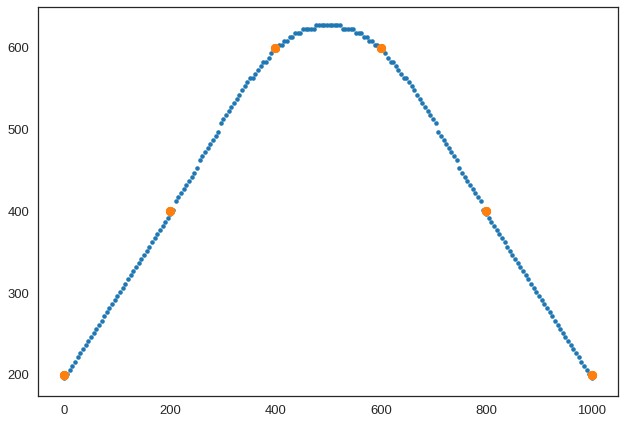

In [5]:
# plot original data
plt.plot(tops_dict['0-1']['xvals'], tops_dict['0-1']['zvals'], '.')
plt.plot(
    surface_points_original_df_1[surface_points_original_df_1.surface == 'rock1']['X'],
    surface_points_original_df_1[surface_points_original_df_1.surface == 'rock1']['Z'],
    'o'
)

In [6]:
Bx = post_pro.compute_boolean_matrix_for_section_surface_top(geo_model)

extent = { 'z_min': 0, 'z_max': 1000 }
section_coordinates = post_pro.compute_setction_grid_coordinates(geo_model, extent)

tops_dict = post_pro.get_tops_coordinates(Bx, section_coordinates)

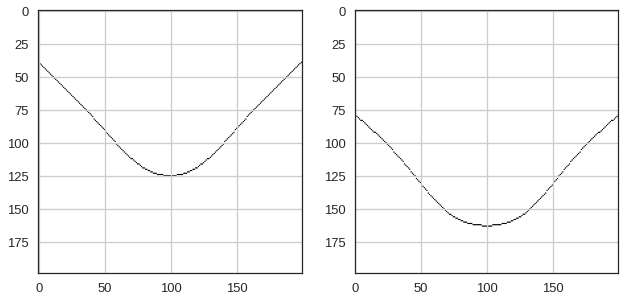

In [7]:
# plot for sanity check
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(Bx['0-1'])
ax1.grid()
ax2.imshow(Bx['0-2'])
ax2.grid()
plt.show()

In [8]:
extent = { 'z_min': 0, 'z_max': 1000 }
section_coordinates = post_pro.compute_setction_grid_coordinates(geo_model, extent)
tops_dict = post_pro.get_tops_coordinates(Bx, section_coordinates)

# Generate new line without nugget effect

## Generate artifical line
- noise is > 10%
- no nugget effect

In [9]:
real_setup.setup_realization(
        geo_model=geo_model,
        geo_model_extent=geo_model_extent_1,
        section=section_1,
        series_df=series_df_1,
        surfaces_df=surfaces_df_1,
        surface_points_original_df=surface_points_original_df_1,
        orientations_original_df=orientations_original_df_1
)

Active grids: ['regular' 'sections']
Active grids: ['regular' 'sections']
HOTFIX in update_series()


## Creat artificail line data

In [10]:
# get interpolated surface and add noise
x = tops_dict['0-1']['xvals']
noise = np.random.normal(0,1,len(x))
xx = x + noise
y = tops_dict['0-1']['yvasl']
noise = np.random.normal(0,1,len(y))
yy = y + noise
yy = np.array(y)
z = tops_dict['0-1']['zvals']
noise = np.random.normal(0,1,len(z))
zz = z + noise

# remove points that are out of bound
xx[xx < 0], xx[xx > 1000] = 0, 1000
yy[yy < 0], yy[yy > 1000] = 0, 1000
zz[zz < 0], zz[zz > 1000] = 0, 1000

In [11]:
# now we remove points that are close to measurements
# rember y is not important for now so we can focus on x
# however we need to filter the x values with the right y vals
bok = np.ones(xx.shape)
sps = surface_points_original_df_1
t = 20

for index, row in sps.iterrows():
    
    # loop over point of measurements and mark points that are close
    x = row['X']
    # y = row['Y']  # as here all points have the same y value in the section
    z = row['Z']
    
    xlow, xheigh = (x - t), x + t
    bx = np.where((xx > xlow) & (xx < xheigh))
    bok[bx] = 0
    
    # ylow, yheigh = (y - t), y + t
    # bx = np.where((yy > ylow) & (yy < yheigh))
    # bok[bx] = 0
    
    zlow, zheigh = (z - t), z + t
    bx = np.where((zz > zlow) & (zz < zheigh))
    bok[bx] = 0
    
# make a boolen out of it
Bok = bok == 1

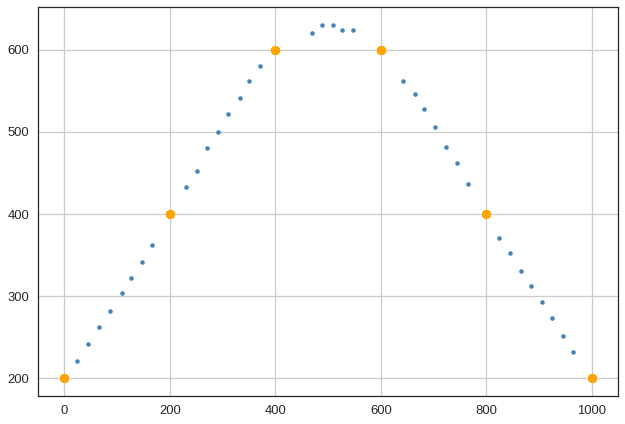

In [12]:
# plot
plt.plot(xx[Bok][::4],zz[Bok][::4], '.', color='steelblue')
plt.plot(
    geo_model.surface_points.df[geo_model.surface_points.df.surface == 'rock1']['X'],
    geo_model.surface_points.df[geo_model.surface_points.df.surface == 'rock1']['Z'],
    'o',
    color='orange'
)
plt.grid()

## Notes
- When lines comest to close to measurements and the a potential lower lines has point over a higher line artifacts get introduced into the model.
To reconstruct: change height of max zvals, y value and/or increase noise 
- by to strong variation within close distance the model collapses as well # take less points

# Do the same but with heigher nugget effect
We are going to increase the smoothness (nugget) of the data to increase the conditional number of the matrix:

In [13]:
real_setup.setup_realization(
        geo_model=geo_model,
        geo_model_extent=geo_model_extent_1,
        section=section_1,
        series_df=series_df_1,
        surfaces_df=surfaces_df_1,
        surface_points_original_df=surface_points_original_df_1,
        orientations_original_df=orientations_original_df_1
)

Active grids: ['regular' 'sections']
Active grids: ['regular' 'sections']
HOTFIX in update_series()


In [14]:
# creat new df
df0 = surface_points_original_df_1
df1 = pd.DataFrame(columns=df0.columns)
df1.X = xx[::4]
df1.Y = yy[::4]
df1.Z = zz[::4]
df1.surface = 'rock1'
df1.param1 = 10

# concate into new df
df2 = pd.concat([df0, df1], ignore_index=True)

Run realizations setup checks until stable workflow.
HOTFIX in gempy/core/gempy_api.py 328


/home/stefan/coding/notebooks/env/lib/python3.8/site-packages/gempy/core/solution.py:196: FutureWarning: marching_cubes_lewiner is deprecated in favor of marching_cubes. marching_cubes_lewiner will be removed in version 0.19
  vertices, simplices, normals, values = measure.marching_cubes_lewiner(


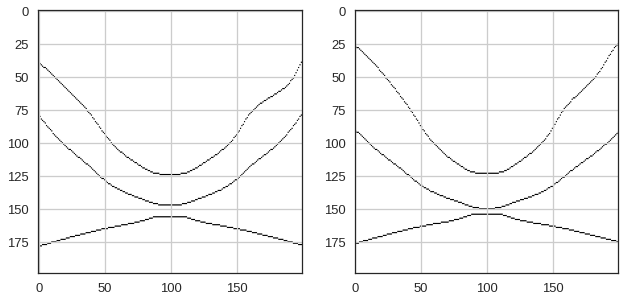

In [15]:
geo_model.set_surface_points(df2, update_surfaces=False)

# we know that df2 is a concentation of the surface_points df and the line df.
# hence the indices of the line are the ones
rang_idx = pd.RangeIndex(start=len(df0.index), stop=len(df2.index), step=1)
geo_model.modify_surface_points(rang_idx, smooth=1)
geo_model.update_to_interpolator()

if real_run.check_setup_single_realization(geo_model):
    solution = gp.compute_model(model=geo_model, sort_surfaces=False)
    
Bx = post_pro.compute_boolean_matrix_for_section_surface_top(geo_model)

extent = { 'z_min': 0, 'z_max': 1000 }
section_coordinates = post_pro.compute_setction_grid_coordinates(geo_model, extent)

tops_dict = post_pro.get_tops_coordinates(Bx, section_coordinates)

# plot for sanity check
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(Bx['0-1'])
ax1.grid()
ax2.imshow(Bx['0-2'])
ax2.grid()
plt.show()